In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk

In [2]:
df= pd.read_csv('combined_dataset.csv')
df

,Reviews
0,كان لي تجربه اكثر من رائعة اليوم في هذا الفرع ...
1,اسوء خدمة شركة اتصالات على المستوى العربي كله ...
2,اشكر الموظفة ضيء على تعاملها ورقيها وخدمتها لي...
3,اسوأ نت في العالم عانيت مليون مرررررا منهم رفع...
4,الفرع جداً ممتاز وأشكر الأخوات الموظفات على رح...
...,...
454,إنترنت لا محدود / سرعة 200 ميقا . . . . #...
455,إنترنت لا محدود / سرعة 200 ميقا . . . . #...
456,سرعة عالية 200ميجا . . . . . . . . . . 🤍💚 #ال...
457,سرعة عالية 200ميجا . . . . . . . . . . 🤍💚 #ال...


In [3]:
def count_duplicates(df):
    """
    Counts the number of duplicate rows in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame in which to find duplicates.

    Returns:
    int: The number of duplicate rows in the DataFrame.
    """
    # Count duplicate rows, excluding the first occurrence
    duplicates_count = df.duplicated(keep='first').sum()
    return duplicates_count

In [4]:
count_duplicates(df)

65

In [5]:
def remove_duplicates(df, subset=None, keep='first', inplace=False):
    """
    Removes duplicate rows from the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove duplicates.
    subset (list of str, optional): Column labels to consider for identifying duplicates. 
                                    If None, consider all columns.
    keep ({'first', 'last', False}, default 'first'): Determines which duplicates (if any) to keep.
                                                      - 'first': Drop duplicates except for the first occurrence.
                                                      - 'last': Drop duplicates except for the last occurrence.
                                                      - False: Drop all duplicates.
    inplace (bool, default False): Whether to drop duplicates in place or to return a copy.

    Returns:
    pd.DataFrame or None: A new DataFrame with duplicates removed, if inplace=False. 
                          None if inplace=True.
    """
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return df.drop_duplicates(subset=subset, keep=keep)

In [6]:
remove_duplicates(df, inplace=True)

In [7]:
count_duplicates(df)

0

In [8]:
df.isna().sum()

Reviews    1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Reviews    0
dtype: int64

## using aranorm for arabic text processing

In [11]:
import aranorm

In [12]:
df['Reviews']=df['Reviews'].apply(aranorm.normalize_tweet)

The following is an explanation of what `aranorm.normalize_tweet` does:

```python
def normalize_tweet(text):
    new_text = text.lower()  # Convert text to lowercase
    new_text = normalize_hamza(new_text)  # Normalize hamza variations
    new_text = strip_tashkeel(new_text)  # Strip Arabic diacritics
    new_text = strip_tatweel(new_text)  # Strip tatweel (kashida)
    new_text = normalize_lamalef(new_text)  # Normalize Lam-Alef variations
    new_text = normalize_spellerrors(new_text)  # Normalize common spelling errors
    new_text = remove_retweet_tag(new_text)  # Remove retweet tags
    new_text = replace_emails(new_text)  # Replace email addresses
    new_text = remove_underscore(new_text)  # Remove underscores
    new_text = replace_phone_numbers(new_text)  # Replace phone numbers
    new_text = remove_all_punctuations(new_text)  # Remove all punctuation
    new_text = replace_urls(new_text)  # Replace URLs
    new_text = convert_eastern_to_western_numerals(new_text)  # Convert Eastern Arabic numerals to Western
    new_text = remove_non_arabic(new_text)  # Remove non-Arabic characters
    new_text = remove_extra_spaces(new_text)  # Remove extra spaces

    return new_text



In [13]:
df

,Reviews
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...
...,...
452,قويه
453,انترنت لا محدود سرعه ميقا زين السعوديه
455,انترنت لا محدود سرعه ميقا زين السعوديه
456,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب


In [14]:
count_duplicates(df)

6

In [15]:
remove_duplicates(df, inplace=True)

In [16]:
count_duplicates(df)

0

In [17]:
df.to_csv('afterPP_dataset.csv', index=False)

## Sentiment Analysis Using Tranformer

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

model_name = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"  # Replace with the specific model you find
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to apply sentiment analysis
def analyze_sentiment(text):
    result = nlp(text)
    return result[0]['label']

# Apply the function to your DataFrame
df['sentiment'] = df['Reviews'].apply(analyze_sentiment)

# Now `df` has an additional column `sentiment` with the analysis result
print(df)

/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                               Reviews sentiment
0    كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...  positive
1    اسوء خدمه شركه اتصالات علي المستوي العربي كله ...  negative
2    اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...  positive
3    اسوا نت في العالم عانيت مليون مرررررا منهم رفع...  negative
4    الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...  positive
..                                                 ...       ...
450  التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...   neutral
452                                               قويه  positive
453             انترنت لا محدود سرعه ميقا زين السعوديه  positive
456     سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب  positive
458  كيف اشترك فيها لان ما تطلع لي بالتطبيق الا اذا...   neutral

[387 rows x 2 columns]


In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

Reviews      0
sentiment    0
dtype: int64

In [21]:
df.to_csv('cleaned_dataset.csv', index=False)

#### we manually removed not needed rows for better utlization of data and hence why it's imported again

In [22]:
# after manual cleaning
df=pd.read_csv('cleaned_dataset.csv')

In [23]:
df

,Reviews,sentiment
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...,positive
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...,negative
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...,positive
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...,negative
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...,positive
...,...,...
382,التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...,neutral
383,قويه,positive
384,انترنت لا محدود سرعه ميقا زين السعوديه,positive
385,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب,positive


## Sentiment Analysis Using Clustering

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(text_data):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(text_data)

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_clusters(text_matrix, cluster_labels):
    # Reduce dimensions to 2D for visualization using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(text_matrix.toarray())

    # Scatter plot of the reduced data
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    
    # Adding title and labels
    plt.title('Text Data Cluster Visualization')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    
    # Adding a legend
    plt.colorbar(scatter, label='Cluster')
    plt.show()


In [26]:
from sklearn.cluster import KMeans

def cluster_texts(df, text_column, num_clusters=3):
    # Extract text data from DataFrame
    text_data = df[text_column].values
    # Vectorize the preprocessed text data
    text_matrix = vectorize_text(text_data)
    # Apply K-means clustering
    km = KMeans(n_clusters=num_clusters)
    km.fit(text_matrix)
    # Assign the cluster labels to the DataFrame
    df['cluster'] = km.labels_
    # Plot clusters
    plot_clusters(text_matrix, km.labels_)
    return df

In [27]:
df.dropna(inplace=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


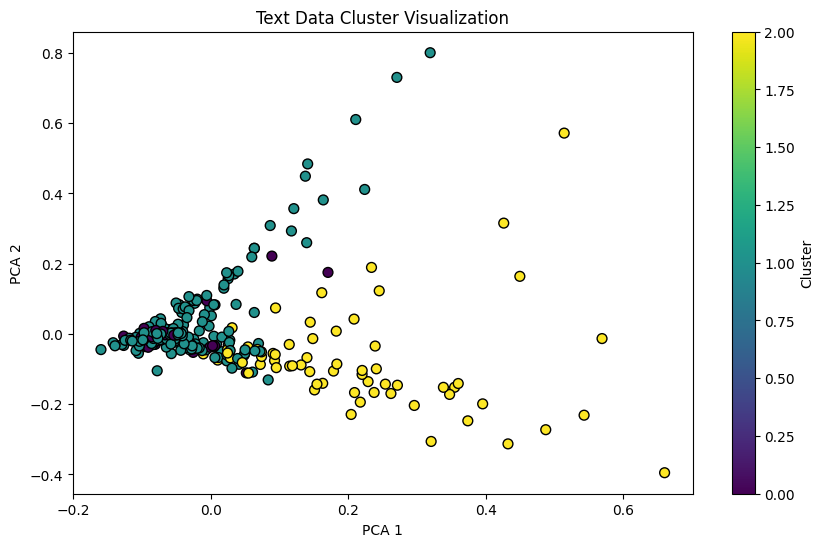

,Reviews,sentiment,cluster
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...,positive,0
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...,negative,1
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...,positive,1
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...,negative,1
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...,positive,2
...,...,...,...
382,التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...,neutral,1
383,قويه,positive,1
384,انترنت لا محدود سرعه ميقا زين السعوديه,positive,1
385,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب,positive,1


In [28]:
with_clusters = cluster_texts(df, 'Reviews', num_clusters=3)
with_clusters

In [29]:
from collections import Counter
def inspect_clusters(df, text_column, cluster_labels, n_top_words=5):

    
    # Group the DataFrame by cluster
    grouped = df.groupby('cluster')
    
    # Iterate through groups and display details
    for name, group in grouped:
        print(f"\nCluster {name}: {len(group)} texts")
        # Display a few texts from the cluster
        print("\nSample texts:")
        print(group[text_column].sample(min(len(group), 5)).to_list())
        
        # Aggregate all text to find the most common words
        words = ' '.join(group[text_column].tolist()).split()
        most_common_words = Counter(words).most_common(n_top_words)
        
        print("\nMost common words:")
        print(", ".join([word for word, freq in most_common_words]))

        print("-" * 80)


In [30]:
inspect_clusters(df, 'Reviews', [0,1,2])


Cluster 0: 56 texts

Sample texts:
['خدمه سيءه و اتمني من الشركه توحد الزي للفتيات مثل الشباب لان المناظر مزعجه للعين و ليست رسميه', 'هذا الفرع لا يوجد فيه الا موظف واحد من اربعه موظفين وخدمتهم بطيءه وسيءه ولا ننصح به بطء الموظف سببه عدم الاحترافيه وقله التدريب وعدم الاهتمام', 'الشيكه اليوم تفصل كل شوي من جي الي ايدج ويفصل النت وش المشكله الخبر حي الثقبه', 'انشوده رمضان جاهزه وتحت امركم مايحتاجون تتعبون انفسكم كلمات وتلحين واداء ساره محمد القحطاني اللهم بارك لنا فيما تبقي من شعبان وبلغنا برحمتك وعافيتك وسترك شهر رمضان المبارك ووفقنا فيه للصيام والقيام وتلاوه القران', 'هل هذي شبكه يا عالم من التحتيال']

Most common words:
من, في, و, ما, الفرع
--------------------------------------------------------------------------------

Cluster 1: 261 texts

Sample texts:
['بالله هذي شبكه في وسط الخبر والله حرام الفلوس الي ندفعها', 'متجر عظيم طاقم عمل جيد', 'المقبول', 'شركه اتصالات ممتازه و موقعها ممتاز يقدمون كل انواع الخدمات و فب وقت قياسي الخدمات و اخلاق الموظفين ممتازه', 'فاضي علي طول']

Most co

In [31]:
def assign_sentiment_labels(df, cluster_to_sentiment):
    # Apply the mapping to the DataFrame
    df['C-sentiment'] = df['cluster'].map(cluster_to_sentiment)
    return df

# Example of a manual mapping based on hypothetical inspection
cluster_to_sentiment = {
    2: 'neutral',
    0: 'positive',
    1: 'negative'
}

sentiment_df = assign_sentiment_labels(with_clusters, cluster_to_sentiment)
sentiment_df

,Reviews,sentiment,cluster,C-sentiment
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...,positive,0,positive
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...,negative,1,negative
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...,positive,1,negative
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...,negative,1,negative
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...,positive,2,neutral
...,...,...,...,...
382,التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...,neutral,1,negative
383,قويه,positive,1,negative
384,انترنت لا محدود سرعه ميقا زين السعوديه,positive,1,negative
385,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب,positive,1,negative


## Visualization

In [32]:
sentiment_df.describe()

,cluster
count,386.000000
mean,1.033679
std,0.568804
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


<Axes: xlabel='sentiment', ylabel='count'>

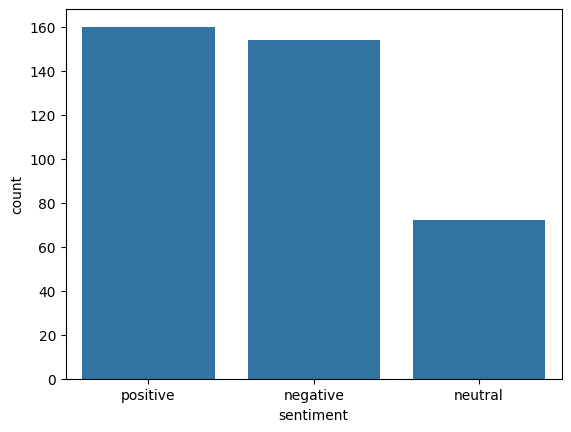

In [33]:
#create a plot to view the distribution of the sentiment using transformer
sns.countplot(x='sentiment', data=sentiment_df)

<Axes: xlabel='C-sentiment', ylabel='count'>

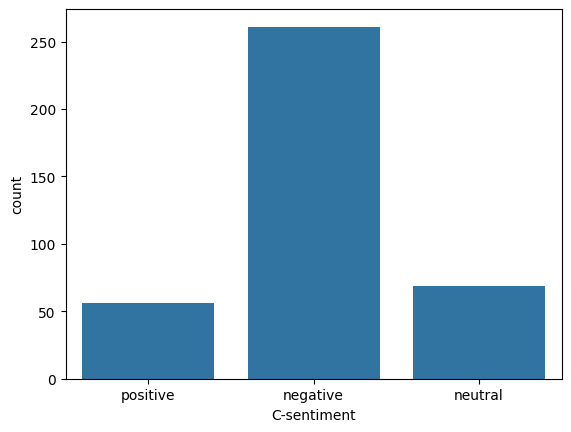

In [34]:
#create a plot to view the distribution of the sentiment using Kmeans
sns.countplot(x='C-sentiment', data=sentiment_df)

### Tokenization to view word frequency 

In [35]:
df_for_tokenization = df.copy()
tokenizer = RegexpTokenizer(r'\w+')
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(tokenizer.tokenize)
stopwords_list = stopwords.words('arabic')
listToStr = ' '.join([str(elem) for elem in stopwords_list])
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(lambda x: [item for item in x if item not in listToStr])
df_for_tokenization

,Reviews,sentiment,cluster,C-sentiment
0,"[تجربه, اكثر, راءعه, اليوم, الفرع, الخدمه, الم...",positive,0,positive
1,"[اسوء, خدمه, شركه, اتصالات, المستوي, العربي, ك...",negative,1,negative
2,"[اشكر, الموظفه, ضيء, تعاملها, ورقيها, وخدمتها,...",positive,1,negative
3,"[اسوا, العالم, عانيت, مليون, مرررررا, منهم, رف...",negative,1,negative
4,"[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...",positive,2,neutral
...,...,...,...,...
382,"[التذكره, ايش, عليها, محد, فيكم, تكرم, تواصل, ...",neutral,1,negative
383,[قويه],positive,1,negative
384,"[انترنت, محدود, سرعه, ميقا, زين, السعوديه]",positive,1,negative
385,"[سرعه, عاليه, ميجا, زين, يارب, وماخاب, قال, يارب]",positive,1,negative


In [36]:
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

def get_most_common_words_by_class(sentiment_df, sentiment, n=10):
    """Get the most common words for each class."""
    classes = sentiment_df[sentiment].unique()
    common_words = {}
    
    for cls in classes:
        words = [word for sublist in sentiment_df[sentiment_df[sentiment] == cls]['Reviews'] for word in sublist]
        most_common = Counter(words).most_common(n)
        common_words[cls] = most_common
        
    return common_words

def plot_most_common_words(common_words):
    """Plot the most common words for each class, applying Arabic reshaping."""
    # Create a figure with subplots
    fig, axes = plt.subplots(len(common_words), 1, figsize=(10, 15), squeeze=False)  # Ensure axes is always 2D
    fig.tight_layout(pad=8.0)
    
    for i, (cls, words) in enumerate(common_words.items()):
        words, frequencies = zip(*words)
        # Reshape words for correct Arabic rendering
        reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word in words]
        
        ax = sns.barplot(x=list(frequencies), y=reshaped_words, ax=axes[i, 0])
        ax.set_title(f'Most Common Words in {get_display(arabic_reshaper.reshape(cls))}', fontsize=16)

        # Set font for both title and y-tick labels to 'Al Bayan'
        ax.title.set_fontname('sans')
        for label in ax.get_yticklabels():
            label.set_fontname('SF Arabic')
        
    plt.show()

/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65257 (\N{ARABIC LETTER HEH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


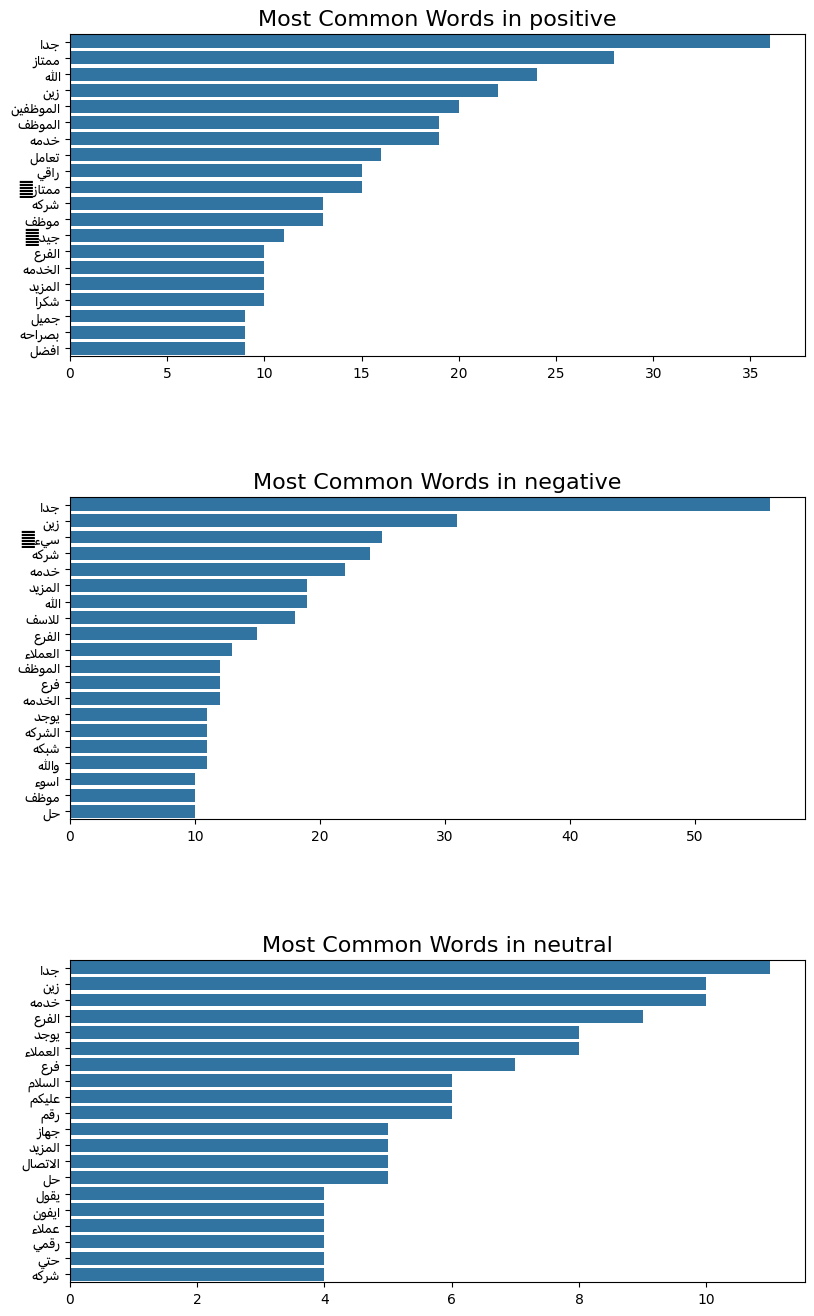

In [37]:
# Get the most common words by class for the 'sentiment' column
common_words = get_most_common_words_by_class(df_for_tokenization,'sentiment' ,n=20)  # Adjust n as needed

# Plot the most common words
plot_most_common_words(common_words)

/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65257 (\N{ARABIC LETTER HEH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


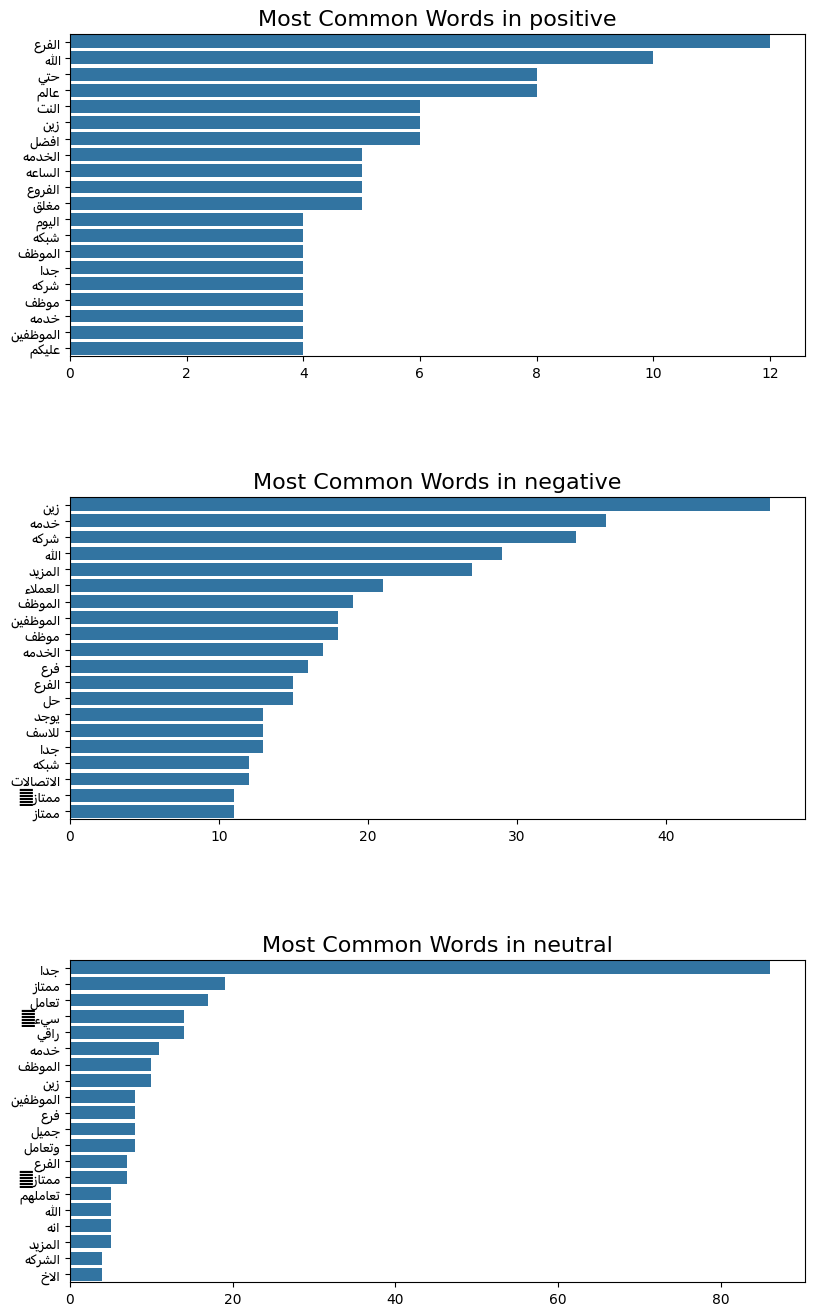

In [38]:
# Get the most common words by class for the 'C-sentiment' column
common_words = get_most_common_words_by_class(df_for_tokenization,'C-sentiment' ,n=20)  # Adjust n as needed

# Plot the most common words
plot_most_common_words(common_words)

<Axes: xlabel='sentiment', ylabel='Reviews_length'>

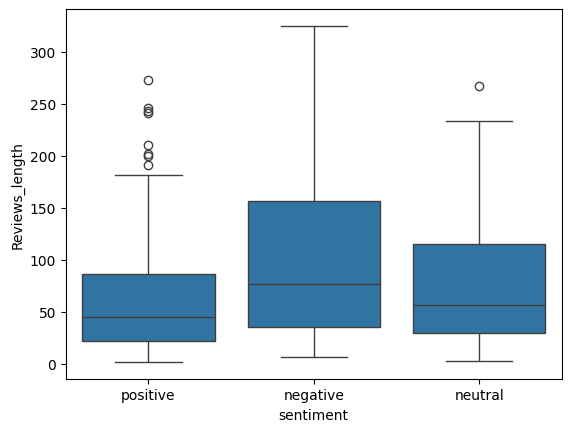

In [39]:
#boxplot to view the distribution of the length of the reviews
df['Reviews_length'] = df['Reviews'].apply(len)
sns.boxplot(x='sentiment', y='Reviews_length', data=df)